<a href="https://colab.research.google.com/github/juniorcavicchioli/cp2-rede-neural-entrega/blob/private/CheckPoint_Rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2 

**NOME: Adilson Roberto Cavicchioli Junior**
**RM: 9####**
**TURMA: 2####**

Utilizando o código abaixo para gerar dados de duas classes, implemente uma rede neural que seja capaz de classificar corretamente os dados.

Utilize como parâmetros seu proprio RM.

exemplo:
 RM = abcde
 - nData = 100 * (a+b+c+d+e)
 - nVertices = 1 * maximo(a,b,c,d,e)

In [ ]:
### execute essa celula, mas não altere essa função.

import numpy as np
import matplotlib.pyplot as plt

## ALTERAÇÃO PARA TESTES
np.random.seed(1)
##########################
def generate_data(nData, nVertices):
    c = np.random.uniform()*2*np.pi
    c1 = np.zeros((nData,2))
    c2 = np.zeros((nData,2))
    for ii in range(nData):
      th = np.random.uniform()*2*np.pi;
      r  = 0.5*np.random.uniform()+1.25+0.2*np.cos(nVertices*(th+c));
      c1[ii,:]=r*np.array([np.cos(th), np.sin(th)]);

      th = np.random.uniform()*3*np.pi;
      r  = np.random.uniform()+0.3*np.cos(nVertices*(th+c));
      c2[ii,:]=r*np.array([np.cos(th), np.sin(th)]);
    return c1, c2

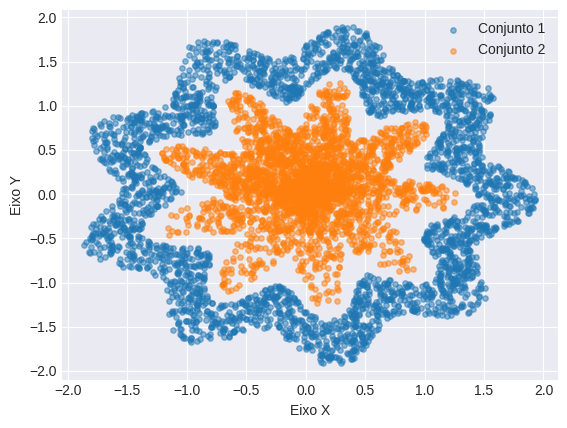

In [ ]:
## coloque seu RM aqui!!
# RM = [9,#,#,#,#]

nData = 100 * 30
nVertices = 1 * 9

#gera os dados
c1, c2 = generate_data(nData,nVertices)

#plot dos dados - fiz pequenas alterações para ficar mais bonitinho :)
plt.scatter(c1[:,0],c1[:,1], alpha=0.5, s=15, label='Conjunto 1')
plt.scatter(c2[:,0],c2[:,1], alpha=0.5, s=15, label='Conjunto 2')
plt.legend()
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

# Exploração

## Ajustes

Transformei os arrays em um dataframe e adicionei em ambos a coluna `tipo` onde `0` é do conjunto **c1** e `1` é do conjunto **c2** para binarizar a coluna que será o alvo de predição.

In [ ]:
import pandas as pd

# Transformando os arrays em dataframe
df_c1 = pd.DataFrame(c1, columns=['X', 'Y'])
df_c2 = pd.DataFrame(c2, columns=['X', 'Y'])

# Adicionando uma coluna para saber a qual grupo pertence
df_c1['tipo'] = 0
df_c2['tipo'] = 1

# Juntando os dataframes em um só
df = pd.concat([df_c1, df_c2])

In [ ]:
df.info()
#df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       6000 non-null   float64
 1   Y       6000 non-null   float64
 2   tipo    6000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 187.5 KB


## Outliers

Pela natureza do problema, os outliers dos conjuntos não necessitam de tratamento. Mas uma curiosidade interessante é que, em todos os testes que fiz, o conjunto **c2** foi o único a apresentar outliers.

In [ ]:
import pandas as pd

def contar_outliers(col, df):
  q1 = df[col].describe()['25%']
  q3 = df[col].describe()['75%']
  iqr = q3 - q1
  upper_bound = q3 + 1.5 * iqr
  lower_bound = q1 - 1.5 * iqr

  # contar os outliers na coluna
  outliers = df[(df[col] > upper_bound) | (df[col] < lower_bound)][col].count()
  return outliers

print(f"Outliers_DataSet: df_1 na coluna X: {contar_outliers('X', df_c1)}")
print(f"Outliers_DataSet: df_1 na coluna Y: {contar_outliers('Y', df_c1)}")
print(f"Outliers_DataSet: df_2 na coluna X: {contar_outliers('X', df_c2)}")
print(f"Outliers_DataSet: df_2 na coluna Y: {contar_outliers('Y', df_c2)}")
print(f"Outliers_DataSet: df   na coluna X: {contar_outliers('X', df)}")
print(f"Outliers_DataSet: df   na coluna Y: {contar_outliers('Y', df)}")

Outliers_DataSet: df_1 na coluna X: 0
Outliers_DataSet: df_1 na coluna Y: 0
Outliers_DataSet: df_2 na coluna X: 43
Outliers_DataSet: df_2 na coluna Y: 146
Outliers_DataSet: df   na coluna X: 0
Outliers_DataSet: df   na coluna Y: 0


Text(0.5, 1.0, 'DF - Y')

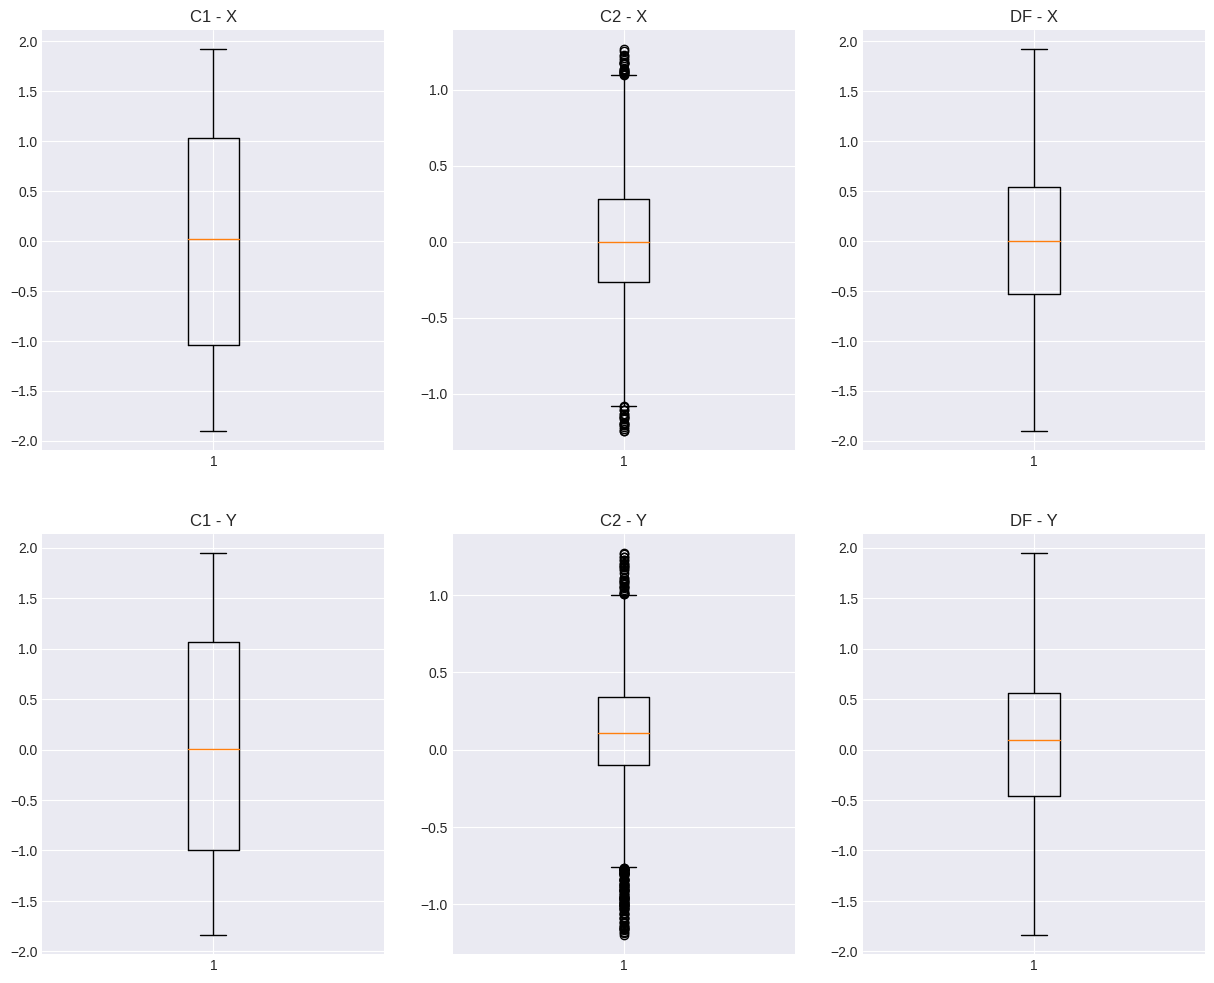

In [ ]:
import matplotlib.pyplot as plt

# fig, ([c1_ax1, c1_ax2],[c2_ax1, c2_ax2], [df_ax1, df_ax2]) = plt.subplots(3, 2, figsize=(10, 18))
fig, ([c1_ax1,c2_ax1,df_ax1],[c1_ax2,c2_ax2,df_ax2]) = plt.subplots(2, 3, figsize=(15, 12))

c1_ax1.boxplot(df_c1['X'])
c1_ax1.set_title('C1 - X')

c1_ax2.boxplot(df_c1['Y'])
c1_ax2.set_title('C1 - Y')

c2_ax1.boxplot(df_c2['X'])
c2_ax1.set_title('C2 - X')

c2_ax2.boxplot(df_c2['Y'])
c2_ax2.set_title('C2 - Y')

df_ax1.boxplot(df['X'])
df_ax1.set_title('DF - X')

df_ax2.boxplot(df['Y'])
df_ax2.set_title('DF - Y')

# Treinamento

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('tipo', axis=1)
y = df["tipo"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('\nX_train: {}, X_test: {}\ny_train: {}, y_test: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))


X_train: (4800, 2), X_test: (1200, 2)
y_train: (4800,), y_test: (1200,)


# ~Modelo - Perceptron~
Inadequado pois é um modelo linear. Mantive apenas para registrar minha *~burrice~* falta de conhecimento.

In [ ]:
from sklearn.linear_model import Perceptron

model = Perceptron(tol=1.5, random_state=42)
model.fit(X_train, y_train)


y_predict = model.predict(X_test)
print("Loss function:", model.loss)

Loss function: perceptron


In [ ]:
from sklearn.metrics import accuracy_score


classes_encontradas_train = model.predict(X_train)
print("Acerto médio de classificação treino: ",accuracy_score(classes_encontradas_train, y_train))

classes_encontradas = model.predict(X_test)
print("Acerto médio de classificação teste: ",accuracy_score(classes_encontradas, y_test))

Acerto médio de classificação treino:  0.6247916666666666
Acerto médio de classificação teste:  0.6175


# Modelo - MLP

## Modelagem
Fiz os testes com diferentes números de camadas, neurônios, com batchnormalization e dropout. Mantive os que achei mais pertinentes e fiz uma função que entende qual modelo deve ser usado: curto, intermediário e longo. Para escolher entre os modelos prontos e o otimizador, basta alterar o código comentado abaixo.

#### **Melhores configurações:**
- _**Eficiencia:** modelo curto com otimizador adam_
- _**Melhores resultados:** modelo longo com otimizador adam_

\* Importante ressaltar que não me aprofundei no **nadam** o suficiente para escolhê-lo com firmeza mesmo ele tendo um melhor resultado com o modelo longo.

In [ ]:
modelo = 'curto'
# modelo = 'intermediario'
# modelo = 'longo'     # Melhores resultados (muito caro)

otimizador = 'adam'
# otimizador = 'sgd'
# otimizador = 'nadam'

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.layers import BatchNormalization

def escolha_modelo(modelo, otimizador):

  model = Sequential()

  if modelo == 'curto':
    model.add(Dense(3,input_dim=2,activation='relu'))
    model.add(Dense(3,activation='relu'))
    model.add(Dense(1,activation='sigmoid')) # sigmoid para saída binária de 0 ou 1

  elif modelo == 'intermediario':

    model.add(Dense(3,input_dim=2,activation='relu'))
    model.add(Dense(3,activation='relu'))
    model.add(Dense(3,activation='relu'))
    model.add(Dense(3,activation='relu'))
    model.add(Dense(1,activation='sigmoid')) # sigmoid para saída binária de 0 ou 1

  elif modelo == 'longo':

    model.add(Dense(15,input_dim=2,activation='relu'))
    model.add(Dense(12,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(8,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(6,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(5,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(4,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer=otimizador, loss='binary_crossentropy', metrics=['accuracy'])
  return model

model = escolha_modelo(modelo, otimizador)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 3)                 9         
                                                                 
 dense_37 (Dense)            (None, 3)                 12        
                                                                 
 dense_38 (Dense)            (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
120/120 [==============================] - 2s 5ms/step - loss: 0.6348 - accuracy: 0.7052 - val_loss: 0.6152 - val_accuracy: 0.7375
Epoch 2/50
120/120 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7372 - val_loss: 0.5821 - val_accuracy: 0.7490
Epoch 3/50
120/120 [==============================] - 0s 4ms/step - loss: 0.5629 - accuracy: 0.7424 - val_loss: 0.5563 - val_accuracy: 0.7500
Epoch 4/50
120/120 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.7523 - val_loss: 0.5344 - val_accuracy: 0.7583
Epoch 5/50
120/120 [==============================] - 1s 5ms/step - loss: 0.5135 - accuracy: 0.7680 - val_loss: 0.5153 - val_accuracy: 0.7604
Epoch 6/50
120/120 [==============================] - 1s 6ms/step - loss: 0.4919 - accuracy: 0.7716 - val_loss: 0.4936 - val_accuracy: 0.7656
Epoch 7/50
120/120 [==============================] - 1s 6ms/step - loss: 0.4590 - accuracy: 0.7990 - val_loss: 0.4522 - val_accuracy: 0.8125
Epoch 

## Resultados

In [ ]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=2)
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

150/150 - 0s - loss: 0.0869 - accuracy: 0.9700 - 364ms/epoch - 2ms/step
38/38 - 0s - loss: 0.0757 - accuracy: 0.9792 - 290ms/epoch - 8ms/step


<ipython-input-161-422d3004f846>:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


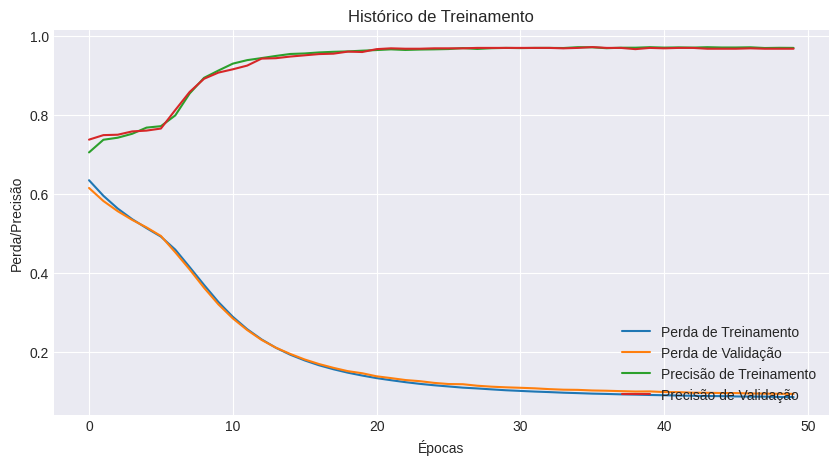

In [ ]:
history_df = pd.DataFrame(history.history)

# history_df[['loss','val_loss']].plot();
# history_df[['accuracy','val_accuracy']].plot();

# Define os dados
loss = history_df['loss']
val_loss = history_df['val_loss']
accuracy = history_df['accuracy']
val_accuracy = history_df['val_accuracy']

# Define as configurações do gráfico
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(10, 5))

# Plota as linhas de perda e precisão
ax.plot(loss, label='Perda de Treinamento')
ax.plot(val_loss, label='Perda de Validação')
ax.plot(accuracy, label='Precisão de Treinamento')
ax.plot(val_accuracy, label='Precisão de Validação')

# Define os rótulos dos eixos e o título do gráfico
ax.set_xlabel('Épocas')
ax.set_ylabel('Perda/Precisão')
ax.set_title('Histórico de Treinamento')

# Adiciona uma legenda
ax.legend(loc='lower right')

# Exibe o gráfico
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Função para avaliar o modelo
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    
    
    # Faça previsões no conjunto de teste
    y_pred = model.predict(X_test)
    
    # Converta os rótulos para inteiros binários (0 ou 1)
    y_test = y_test.astype(int)
    y_pred = (y_pred > 0.5).astype(int)

    
    # Calcule as métricas de avaliação
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, recall, f1

# def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    
    
#     # Faça previsões no conjunto de teste
#     y_pred = np.argmax(model.predict(X_test), axis=-1)
    
#     # Converta os rótulos para inteiros
#     y_test = y_test.astype(int)
#     y_pred = y_pred.astype(int)

    
#     # Calcule as métricas de avaliação
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
#     recall = recall_score(y_test, y_pred, average='weighted')
#     f1 = f1_score(y_test, y_pred, average='weighted')
    
#     return accuracy, precision, recall, f1

# Treine e avalie o modelo
accuracy, precision, recall, f1 = train_and_evaluate_model(model, X_train, X_test, y_train, y_test)

# Exiba os resultados
print("Acurácia:", round(accuracy,4))
print("Precisão:", round(precision,4))
print("Revocação:", round(recall,4))
print("F1-Score:", round(f1,4))


38/38 [==============================] - 0s 3ms/step
Acurácia: 0.9792
Precisão: 0.9795
Revocação: 0.9779
F1-Score: 0.9787


# Interpretações e considerações
Aqui estão as perguntas que estruturei me baseando nos tópicos que serão avaliados pelo professor e também as perguntas do forms.

- **Estrutura do código:**
>Considero bem estruturado :D
  >Além da divisão por etapas, fiz uma função que permita rápidamente testar os meus modelos favoritos alterando o valor de variáveis no primeiro bloco de código de modelagem. Por praticidade, mantive uma maneira rápida de alterar o otimizador mesmo algumas configurações sendo bem inferiores.

- **Quais foram os testes realizados?**
>Priorizei a acurácia pois é a mais relevante para avaliar predições binárias e confiável quando se trata de dados bem proporcionais - tenho 3000 de um conjunto e 3000 de outro. Aproveitei para medir a precisão, o recall e o F1-Score que combina a precisão e o recall em um só.

  > Fiz também comparações dos resultados entre diferentes modelagens da rede neural envolvendo camadas, números de neurônios etc.

- **Qual a influência do número de neurônios? E do número de camadas?**
>Aparentemente, quanto mais neurônios, menor o custo-benefício. A Lei de Brooks se aplica aqui. Quanto mais recursos (neurônios) eu coloco, menores são os benefícios. O mesmo se aplica às camadas.

  >Por fim, escolhi como melhor resultado o menor modelo mesmo tendo resultados inferiores comparado com um maior número de camadas. A natureza do problema me permite abrir mão de 1-2% de ganho nos resultados em troca de mais eficiência, o que dá, usando meus dados como métrica, aproximadamnte 60-120 erros a mais. Se fosse um modelo que predita se alguém está doente, por exemplo, minha decisão seria inversa. Priorizar os melhores resultados mesmo com uma grande perda de eficiência seria muito melhor.

- **Qual a ifluência do algoritmo de adaptação? E dos parâmetros?**
>Escolhi o **Adam** como principal. Sabe-se que ele é adequado para problemas com grande volume de dados - no meu caso, 6000 - e lida bem com predições binárias. O algoritmo **Nadam** com o modelo longo foi o que teve melhor resultado, porém não sei exatamente o que ele faz e, conforme explicado no tópico acima, priorizei a performance, o que ele não manteve com o modelo curto que fiz.

  >Decidi que não há necessidade de usar o Dropout pois a diferença entre treino e teste foram muito baixas. Acho muito difícil estar gerando overfitting. Testei o BatchNormalization em conjunto com os testes de várias camadas onde ele é mais eficiente e não percebi grandes mudanças.

- **Qual a influência da função de ativação?**
>Escolhi a **relu** para as camadas intermediárias. Sua eficiência ajuda para meu problema com uma relevante quantia de dados além de promover a não-linearidade, o que condiz com os dados que tenho.

  >Para a camada de saída, utilizei o **sigmoid**. Ele é útil porque pode produzir uma saída que indica a probabilidade de pertencer à classe `1`, o que funciona muito bem para classificações binárias já que, se tiver pouca probabilidade de pertencer a classe `1`, então pertence a `0`.
